<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/Desarrollo%20Parcial%201%20SYS%202024-I/Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 2**


# **Punto 4**

**Consulte en que consiste la distorcion total de armonicos(Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico.**

**THD:** Consiste en que se parte de un sistema ideal en el que la función de transferencia es lineal e invariante en el tiempo. Cuando una señal sinusoidal de frecuencia ω pasa por un dispositivo no ideal y no lineal, se añade contenido adicional en múltiplos nω (armónicos) de la frecuencia original. La THD es una medida de ese contenido de señal adicional no presente en la señal de entrada. Esta puede ser THD indicandonos con respecto al voltaje o tambien puede ser THDi la cual es con respecto a la corriente.

**FP:** Es la relación entre la potencia real y la potencia aparente en un circuito o sistema de distribución. La potencia real se mide en W o kW, y es la que utilizan los motores, las luces y otros dispositivos para producir trabajo útil. La potencia aparente se mide en VA o kVA, que es la suma vectorial de la potencia real(trabajo util), la potencia reactiva(almacenada y liberada por inductores y condensadores y muestra el desplazamiento de fase entre las formas de onda de corriente y tensión) y la potencia armónica(la cual se pierde por distorsion armonica).


**¿Como puede calcularse el THD desde la FFT?**

Los pasos a seguir serian: 1)Realizar la FFT: Esto transforma la señal del dominio del tiempo al dominio de la frecuencia, permitiendo identificar las diferentes componentes de frecuencia, incluyendo la fundamental y los armónicos. 2)Identificar la frecuencia fundamental: Una vez que se tiene el espectro de frecuencias, se debe identificar la frecuencia fundamental V1, que es la frecuencia más baja y representa la señal principal. 3)Calcular las amplitudes de los armónicos: A partir del espectro de la FFT, se deben extraer las amplitudes de los armónicos
Vn donde n es el número de armónico, comenzando desde el armonico 2 y tomando los componentes de frecuencia que son múltiplos enteros de la frecuencia fundamental. 4)Aplicar la fórmula del THD:

$$THD = \frac{\sqrt{V_2+V_3+\cdots V_n}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).

**¿Como puede calcularse la distorsión del factor de potencia con base al THD?**

El factor de potencia de distorsión es la relación entre la potencia real y la potencia aparente debido a la distorsión armónica total (THD). No se pueden añadir condensadores a un circuito para compensar el factor de potencia de distorsión. La impedancia de los condensadores disminuye con la frecuencia. Por lo tanto, un condensador puede convertirse en un sumidero de armónicos de alta frecuencia. Se utilizan tipos especiales de transformadores o filtros armónicos sintonizados que constan de condensadores e inductores para corregir el factor de potencia de distorsión. El factor de potencia de distorsión se calcula de la siguiente manera:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$

**Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i)Netamente resistiva y ii)Carga RC en serie.**

In [14]:
#Carga netamente resisitiva

import numpy as np
import matplotlib.pyplot as plt

Vin = 120 #Voltaje de entrada del circuito
Rt = 5 #Relación de transformación 5:1
R = input("Digite el valor de la resistencia en ohmios: ")#Resistencia de la carga

#graficar_THD_FP()

def calcular_THD_FPrc(Vin,Rt,R):
  Iin = Vin / R #Corriente de entrada del circuito
  Irms = Iin / Rt #Valor RMS de la corriente del circuito
  Vrms = Vin / Rt #Valor RMS del voltaje del circuito
  VPreal = (Vrms * np.sqrt(2)) - 1.4 #Voltaje pico real, se le resta 1.4 por la caída de tensión de los 2 diodos en serie
  Vcd = (2 * VPreal) / np.pi #Voltaje de salida en cd
  Icd = Vcd / R #Intensidad de salida en cd

  Pin = Vrms * Irms #Calcula la potencia de entrada
  Pout = Vcd * Icd #Calcula la potencia de salida
  Efc = Pout / Pin #Calcula la eficiencia
  THD = np.sqrt((Pin - Pout) / Pin) #Calcula el THD
  FP = Efc / np.sqrt(1 - THD**2) #Calcula la distorsión del factor de potencia
  return THD, FP

def graficar_THD_FP(THD, FP):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].plot(THD, label='THD')
  ax[0].set_xlabel('Frecuencia (Hz)')
  ax[0].set_ylabel('THD (%)')
  ax[0].set_title('THD vs Frecuencia')
  ax[0].legend()
  ax[1].plot(FP, label='Factor de Potencia')
  ax[1].set_xlabel('Frecuencia (Hz)')
  ax[1].set_ylabel('Factor de Potencia')
  ax[1].set_title('Factor de Potencia vs Frecuencia')
  ax[1].legend()
  plt.show()

Digite el valor de la resistencia en ohmios: 1000


Digite el valor de la resistencia en ohmios: 1000
Digite el valor de la capacitancia en faradios: 10e-6


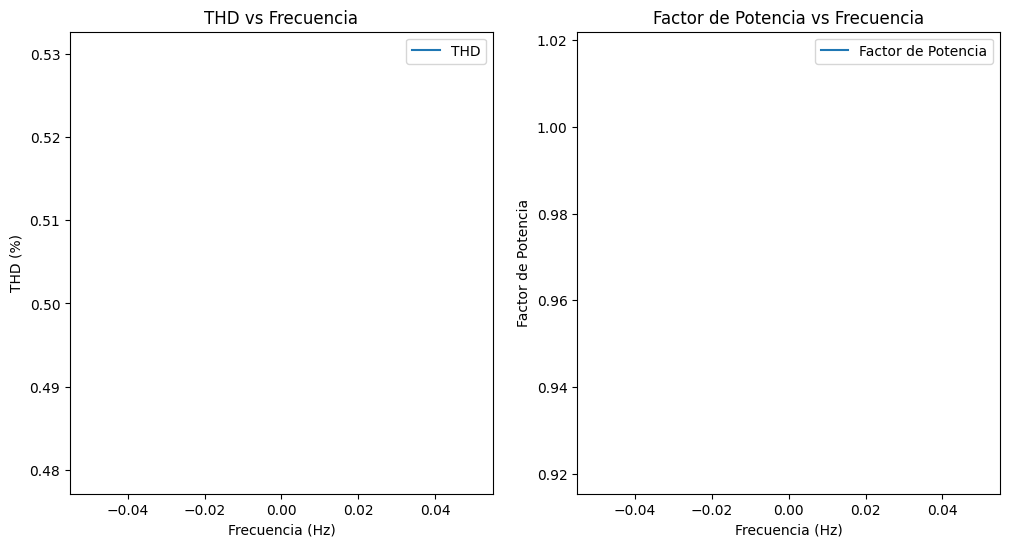

ValueError: too many values to unpack (expected 2)

In [12]:
#Carga RC en serie

import numpy as np
import matplotlib.pyplot as plt

Vin = 120 #Voltaje de entrada del circuito
Rt = 5 #Relación de transformación 5:1
R = float(input("Digite el valor de la resistencia en ohmios: ")) #Resistencia de la carga
C = float(input("Digite el valor de la capacitancia en faradios: ")) #Capacitancia de la carga
F = float(input("Digite el valor de la frecuencia de señal de entrada: "))

def calcular_THD_FPrc(Vin,Rt,R,C,F):
  Iin = float(Vin / R) #Corriente de entrada del circuito
  Irms = float(Iin / Rt) #Valor RMS de la corriente del circuito
  Vrms = float(Vin / Rt) #Valor RMS del voltaje del circuito
  VPreal = float((Vrms * np.sqrt(2)) - 1.4) #Voltaje pico real, se le resta 1.4 por la caída de tensión de los 2 diodos en serie
  Vcd = float((2 * VPreal) / np.pi) #Voltaje de salida en cd
  Icd = float(Vcd / R) #Intensidad de salida en cd

  Z = float(np.sqrt(R**2 + (1 / (2 * np.pi * F * C))**2))
  Pin = float(Vrms * Irms) #Calcula la potencia de entrada
  Pout = float(Vcd * Icd) #Calcula la potencia de salida
  Efc = float(Pout / Pin) #Calcula la eficiencia
  THD = float(np.sqrt((Pin - Pout) / Pin)) #Calcula el THD
  FP = float(Efc / np.sqrt(1 - THD**2)) #Calcula la distorsión del factor de potencia

  Phi = float(np.arctan(1 / (2 * np.pi * F * R * C))) #Calcula el ángulo de fase entre la tensión y la corriente
  Q = float(Vrms * Irms * np.sin(Phi)) #Calcula la potencia reactiva
  S = float(np.sqrt(Pin**2 + Q**2)) #Calcula la potencia aparente
  FPrc = float(Pin / S) #Calcula el factor de potencia
  return THD, FPrc
def graficar_THD_FP(THD, FPrc)
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].plot(THD, label='THD')
  ax[0].set_xlabel('Frecuencia (Hz)')
  ax[0].set_ylabel('THD (%)')
  ax[0].set_title('THD vs Frecuencia')
  ax[0].legend()
  ax[1].plot(FPrc, label='Factor de Potencia')
  ax[1].set_xlabel('Frecuencia (Hz)')
  ax[1].set_ylabel('Factor de Potencia')
  ax[1].set_title('Factor de Potencia vs Frecuencia')
  ax[1].legend()
  plt.show()

F = np.linspace(40, 60, 100)
thd = np.zeros_like(F)
fprc = np.zeros_like(F)
for i, freq in enumerate(F):
  thd[i], fprc[i] = (Vrms, Irms, Vcd, Icd, R, C, freq)

In [ ]:
#Carga netamente resisitiva

import numpy as np
import matplotlib.pyplot as plt

Vin = 120 #Voltaje de entrada del circuito
Rt = 5 #Relación de transformación 5:1
R = float(input("Digite el valor de la resistencia en ohmios: ")) #Resistencia de la carga
def calcular_THD_FPrc(Vin,Rt,R):
  Iin = float(Vin / R) #Corriente de entrada del circuito
  Irms = float(Iin / Rt) #Valor RMS de la corriente del circuito
  Vrms = float(Vin / Rt) #Valor RMS del voltaje del circuito
  VPreal = float((Vrms * np.sqrt(2)) - 1.4) #Voltaje pico real, se le resta 1.4 por la caída de tensión de los 2 diodos en serie
  Vcd = float((2 * VPreal) / np.pi) #Voltaje de salida en cd
  Icd = float(Vcd / R) #Intensidad de salida en cd

  Pin = float(Vrms * Irms) #Calcula la potencia de entrada
  Pout = float(Vcd * Icd) #Calcula la potencia de salida
  Efc = float(Pout / Pin) #Calcula la eficiencia
  THD = float(np.sqrt((Pin - Pout) / Pin)) #Calcula el THD
  FP = float(Efc / np.sqrt(1 - THD**2)) #Calcula la distorsión del factor de potencia
  return THD, FP

def graficar_THD_FP(THD, FP):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].plot(THD, label='THD')
  ax[0].set_xlabel('Frecuencia (Hz)')
  ax[0].set_ylabel('THD (%)')
  ax[0].set_title('THD vs Frecuencia')
  ax[0].legend()
  ax[1].plot(FP, label='Factor de Potencia')
  ax[1].set_xlabel('Frecuencia (Hz)')
  ax[1].set_ylabel('Factor de Potencia')
  ax[1].set_title('Factor de Potencia vs Frecuencia')
  ax[1].legend()
  plt.show()